In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DF
from sympy import diff
from sympy.abc import x,y
from sympy import cos
from sympy import *
from sympy import lambdify

### Set display of pandas dataframes and Series to 11 decimal places

In [2]:
pd.set_option("display.precision", 11)

## Define Hamiltonian

Use the given lagrangian in the pdf to calculate the Hamiltonian using the definition.

H = $\sum (p_i * \text{q_dot_i}) - L$

where $p_i = \frac{\partial L}{\partial \text{q_dot_i}}$.

In this case the Lagrangian $L = L_0 + L_2$, with $L_0$ being a term with no q_dot_i dependence and $L_2$ having quadratic q_dot_i dependence. Then the Hamiltonian equals $H = -L_O + L_2$. This is how the Hamiltonian is defined below.

This was done using Mathematica.

In [3]:
def H(x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2):
    
    L_0 = ( -x_1**2/2 - 1/2*Lambda_2**2*x_1**6 - Lambda_2*x_1**3*x_2 - 
            x_2**2/2 - Lambda_1*x_1*x_2**3 - 1/2*Lambda_1**2 * x_2**6 -
            y_1**2/2 - 3/2*Lambda_2**2*x_1**4*y_1**2 + 3*Lambda_2*x_1*x_2*y_1**2 -
            3/2*Lambda_2**2*x_1**2*y_1**4 - 1/2*Lambda_2**2*y_1**6 -
            3*Lambda_2*x_1**2*y_1*y_2 - 3*Lambda_1*x_2**2*y_1*y_2 + Lambda_2*y_1**3*y_2 -
            y_2**2/2 + 3*Lambda_1*x_1*x_2*y_2**2 - 3/2*Lambda_1**2*x_2**4*y_2**2 +
            Lambda_1*y_1*y_2**3 - 3/2*Lambda_1**2*x_2**2*y_2**4 - 
                1/2*Lambda_1**2*y_2**6)
            
    
    L_2 = 1/2*(p_x_1**2 + p_y_1**2) + 1/2*(p_x_2**2 + p_y_2**2)
    
    return -L_0 + L_2

Define the Hamilton canonical equations.

In [4]:
def P_x_dot_1(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2):
    return ((-3*Lambda_2**2*x_1**5 - 3*Lambda_2*x_1**2*x_2 - 6*Lambda_2**2*x_1**3*y_1**2 -
                 x_1 * (1 + 3*Lambda_2**2*y_1**4 + 6*Lambda_2*y_1*y_2) + x_2 * 
                 (-Lambda_1*x_2**2 + 3*Lambda_2*y_1**2 + 3*Lambda_1*y_2**2)))
    
def P_x_dot_2(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2):
    return (-( Lambda_2*x_1**3 + 3*x_1 * (Lambda_1*x_2**2 -Lambda_2*y_1**2 - Lambda_1*y_2**2) +
                 x_2 * (1 + 3*Lambda_1**2*x_2**4 + 6*Lambda_1*y_1*y_2 + 6*Lambda_1**2*x_2**2*y_2**2
                        + 3*Lambda_1**2*y_2**4) ))

def P_y_dot_1(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2):
    return ( -( y_1 * (1 + 3*Lambda_2**2*x_1**4 - 6*Lambda_2*x_1*x_2) + 
                 6*Lambda_2**2*x_1**2*y_1**3 + 3*Lambda_2**2*y_1**5 - 3*Lambda_2*y_1**2*y_2 + 
                 y_2 * (3*Lambda_2*x_1**2 + 3*Lambda_1*x_2**2 - Lambda_1*y_2**2) ) )

def P_y_dot_2(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2):
    return ( -( 3*Lambda_2*x_1**2*y_1 - Lambda_2*y_1**3 + y_2 - 6*Lambda_1*x_1*x_2*y_2 +
                 3*Lambda_1**2*x_2**4*y_2 - 3*Lambda_1*y_1*y_2**2 + 3*Lambda_1**2*y_2**5 + 
                 3*Lambda_1*x_2**2 * (y_1 + 2*Lambda_1*y_2**3)) )

### Simulation
Code for part 3 of the Harmonic oscillator warm up. Do the numerical integration simulation. The algorithm is outlined in the black supreme A4 hardback.

Label all the coordinates that will be used for the simulation.

In [5]:
labels = ["x_1", "x_2", "y_1", "y_2", 
               "p_x_1", "p_x_2", "p_y_1", "p_y_2", 
               "p_x_dot_1", "p_x_dot_2", "p_y_dot_1", "p_y_dot_2"]

Use the Velocity Verlet algorithm along with the solutions to Hamilton's canonical equations as solved using mathematica and transcribed here to simulate the evolving phase space of the system.

In [6]:
def simulation_3(x_1, x_2, y_1, y_2, 
               p_x_1, p_x_2, p_y_1, p_y_2):

    
    # Coefficients
    Lambda_1 = 5.27
    Lambda_2 = .9
    
    # The rates of change of momenta are linked to the coordinates by the Hamiltonian canonical equations
    # These were calculated using Mathematica.
        
    p_x_dot_1 = (-3*Lambda_2**2*x_1**5 - 3*Lambda_2*x_1**2*x_2 - 6*Lambda_2**2*x_1**3*y_1**2 -
                 x_1 * (1 + 3*Lambda_2**2*y_1**4 + 6*Lambda_2*y_1*y_2) + x_2 * 
                 (-Lambda_1*x_2**2 + 3*Lambda_2*y_1**2 + 3*Lambda_1*y_2**2))
    
    
    p_x_dot_2 = -( Lambda_2*x_1**3 + 3*x_1 * (Lambda_1*x_2**2 -Lambda_2*y_1**2 - Lambda_1*y_2**2) +
                 x_2 * (1 + 3*Lambda_1**2*x_2**4 + 6*Lambda_1*y_1*y_2 + 6*Lambda_1**2*x_2**2*y_2**2
                        + 3*Lambda_1**2*y_2**4) )
    
    p_y_dot_1 = -( y_1 * (1 + 3*Lambda_2**2*x_1**4 - 6*Lambda_2*x_1*x_2) + 
                 6*Lambda_2**2*x_1**2*y_1**3 + 3*Lambda_2**2*y_1**5 - 3*Lambda_2*y_1**2*y_2 + 
                 y_2 * (3*Lambda_2*x_1**2 + 3*Lambda_1*x_2**2 - Lambda_1*y_2**2) )

    p_y_dot_2 = -( 3*Lambda_2*x_1**2*y_1 - Lambda_2*y_1**3 + y_2 - 6*Lambda_1*x_1*x_2*y_2 +
                 3*Lambda_1**2*x_2**4*y_2 - 3*Lambda_1*y_1*y_2**2 + 3*Lambda_1**2*y_2**5 + 
                 3*Lambda_1*x_2**2 * (y_1 + 2*Lambda_1*y_2**3))
    
    labels = ["x_1", "x_2", "y_1", "y_2", 
               "p_x_1", "p_x_2", "p_y_1", "p_y_2", 
               "p_x_dot_1", "p_x_dot_2", "p_y_dot_1", "p_y_dot_2"]
    
    i = 0

    # Define number of steps between measurement recordings
    record_steps = 100
    
    # Timestep
    delta_t = (0.0001)


    # Initial coordinates 
    old_coordinates = [x_1, x_2, y_1, y_2, 
               p_x_1, p_x_2, p_y_1, p_y_2, 
               p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2]

    # Coordinates list to record simulation dynamics
    global coordinates_list 
    coordinates_list = [[x_1], [x_2], [y_1], [y_2], 
               [p_x_1], [p_x_2], [p_y_1], [p_y_2], 
               [p_x_dot_1], [p_x_dot_2], [p_y_dot_1], [p_y_dot_2]]


    simulation_repetitions = 1000000
    
    # Repeating algorithm
    while i < simulation_repetitions:
        
        # Define old variables
        [x_1_old, x_2_old, y_1_old, y_2_old, p_x_1_old, p_x_2_old, p_y_1_old, p_y_2_old, p_x_dot_1_old,
         p_x_dot_2_old, p_y_dot_1_old, p_y_dot_2_old] = old_coordinates
        
        
        # b) velocity Verlet 1 to get new positions from old positions, momentums and rate of change of momentums
        
        x_1_new = (x_1_old + p_x_1_old * delta_t + 1/2 * p_x_dot_1_old * delta_t**2)
        x_2_new = (x_2_old + p_x_2_old * delta_t + 1/2 * p_x_dot_2_old * delta_t**2)
        y_1_new = (y_1_old + p_y_1_old * delta_t + 1/2 * p_y_dot_1_old * delta_t**2)
        y_2_new = (y_2_old + p_y_2_old * delta_t + 1/2 * p_y_dot_2_old * delta_t**2)

        
        # c) Use Hamiltonian canonical equations to get new p_dot values
        
        p_x_dot_1_new = -(3*Lambda_2**2*x_1_new**5 + 3*Lambda_2*x_1_new**2*x_2_new + 6*Lambda_2**2*x_1_new**3*y_1_new**2 +
                         x_1_new * (1 + 3*Lambda_2**2*y_1_new**4 + 6*Lambda_2*y_1_new*y_2_new) - x_2_new * 
                         (-Lambda_1*x_2_new**2 + 3*Lambda_2*y_1_new**2 + 3*Lambda_1*y_2_new**2))
    
        p_x_dot_2_new = -( Lambda_2*x_1_new**3 + 3*x_1_new * (Lambda_1*x_2_new**2 -Lambda_2*y_1_new**2 - Lambda_1*y_2_new**2) +
                         x_2_new * (1 + 3*Lambda_1**2*x_2_new**4 + 6*Lambda_1*y_1_new*y_2_new + 6*Lambda_1**2*x_2_new**2*y_2_new**2
                            + 3*Lambda_1**2*y_2_new**4) )
    
        p_y_dot_1_new = -( y_1_new * (1 + 3*Lambda_2**2*x_1_new**4 - 6*Lambda_2*x_1_new*x_2_new) + 
                         6*Lambda_2**2*x_1_new**2*y_1_new**3 + 3*Lambda_2**2*y_1_new**5 - 3*Lambda_2*y_1_new**2*y_2_new + 
                         y_2_new * (3*Lambda_2*x_1_new**2 + 3*Lambda_1*x_2_new**2 - Lambda_1*y_2_new**2) )

        p_y_dot_2_new = -( 3*Lambda_2*x_1_new**2*y_1_new - Lambda_2*y_1_new**3 + y_2_new - 6*Lambda_1*x_1_new*x_2_new*y_2_new +
                         3*Lambda_1**2*x_2_new**4*y_2_new - 3*Lambda_1*y_1_new*y_2_new**2 + 3*Lambda_1**2*y_2_new**5 + 
                         3*Lambda_1*x_2_new**2 * (y_1_new + 2*Lambda_1*y_2_new**3))


        # d) Use Velocity Verlet 2 to get new momentums

        p_x_1_new = (p_x_1_old + (1/2) * (p_x_dot_1_new + p_x_dot_1_old) * delta_t)
        p_x_2_new = (p_x_2_old + (1/2) * (p_x_dot_2_new + p_x_dot_2_old) * delta_t)
        p_y_1_new = (p_y_1_old + (1/2) * (p_y_dot_1_new + p_y_dot_1_old) * delta_t)
        p_y_2_new = (p_y_2_old + (1/2) * (p_y_dot_2_new + p_y_dot_2_old) * delta_t)

        new_coordinates = [x_1_new, x_2_new, y_1_new, y_2_new, 
                           p_x_1_new, p_x_2_new, p_y_1_new, p_y_2_new,
                           p_x_dot_1_new, p_x_dot_2_new, p_y_dot_1_new, p_y_dot_2_new]
        
        
        # Recording position, momentum, and rate of change of momentum every 10th step
        if i % record_steps == 0:
            h = 0

            while h < len(coordinates_list):
                coordinates_list[h].append(new_coordinates[h])
                h += 1
                
                
        # Update new coordinates

        old_coordinates = new_coordinates

        i += 1
    global times
    times = np.arange(0,simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)
    
    coords_dict = {"times" : times, labels[0] : coordinates_list[0], labels[0] : coordinates_list[0], 
                  labels[1] : coordinates_list[1], labels[2] : coordinates_list[2], labels[3] : coordinates_list[3], 
                  labels[4] : coordinates_list[4], labels[5] : coordinates_list[5], labels[6] : coordinates_list[6], 
                  labels[7] : coordinates_list[7], labels[8] : coordinates_list[8], labels[9] : coordinates_list[9], 
                  labels[10] : coordinates_list[10], labels[11] : coordinates_list[11]}
    
    global Coords
    Coords = DF(coords_dict, index = coords_dict["times"], columns = labels)
    return Coords

In [7]:
def simulation(x_1, x_2, y_1, y_2, 
               p_x_1, p_x_2, p_y_1, p_y_2):

    
    # Coefficients
    Lambda_1 = 5.27
    Lambda_2 = .9
    
    # The rates of change of momenta are linked to the coordinates by the Hamiltonian canonical equations.
    # These were calculated using Mathematica.
        
    p_x_dot_1 = P_x_dot_1(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)
    
    p_x_dot_2 = P_x_dot_2(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)
    
    p_y_dot_1 = P_y_dot_1(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)

    p_y_dot_2 = P_y_dot_2(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)
    
    labels = ["x_1", "x_2", "y_1", "y_2", 
               "p_x_1", "p_x_2", "p_y_1", "p_y_2", 
               "p_x_dot_1", "p_x_dot_2", "p_y_dot_1", "p_y_dot_2"]
    
    i = 0

    # Define number of steps between measurement recordings
    record_steps = 100
    
    # Timestep
    delta_t = (0.0001)


    # Initial coordinates 
    old_coordinates = [x_1, x_2, y_1, y_2, 
               p_x_1, p_x_2, p_y_1, p_y_2, 
               p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2]

    # Coordinates list to record simulation dynamics
    global coordinates_list 
    coordinates_list = [[x_1], [x_2], [y_1], [y_2], 
               [p_x_1], [p_x_2], [p_y_1], [p_y_2], 
               [p_x_dot_1], [p_x_dot_2], [p_y_dot_1], [p_y_dot_2]]


    simulation_repetitions = 100000
    
    # Repeating algorithm
    while i < simulation_repetitions:
        
        # Define old variables
        [x_1_old, x_2_old, y_1_old, y_2_old, p_x_1_old, p_x_2_old, p_y_1_old, p_y_2_old, p_x_dot_1_old,
         p_x_dot_2_old, p_y_dot_1_old, p_y_dot_2_old] = old_coordinates
        
        
        # b) velocity Verlet 1 to get new positions from old positions, momentums and rate of change of momentums
        
        x_1_new = (x_1_old + p_x_1_old * delta_t + 1/2 * p_x_dot_1_old * delta_t**2)
        x_2_new = (x_2_old + p_x_2_old * delta_t + 1/2 * p_x_dot_2_old * delta_t**2)
        y_1_new = (y_1_old + p_y_1_old * delta_t + 1/2 * p_y_dot_1_old * delta_t**2)
        y_2_new = (y_2_old + p_y_2_old * delta_t + 1/2 * p_y_dot_2_old * delta_t**2)

        
        # c) Use Hamiltonian canonical equations to get new p_dot values
        
        p_x_dot_1_new = P_x_dot_1(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)
    
        p_x_dot_2_new = P_x_dot_2(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)
    
        p_y_dot_1_new = P_y_dot_1(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)
        
        p_y_dot_2_new = P_y_dot_2(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)

        # d) Use Velocity Verlet 2 to get new momentums

        p_x_1_new = (p_x_1_old + (1/2) * (p_x_dot_1_new + p_x_dot_1_old) * delta_t)
        p_x_2_new = (p_x_2_old + (1/2) * (p_x_dot_2_new + p_x_dot_2_old) * delta_t)
        p_y_1_new = (p_y_1_old + (1/2) * (p_y_dot_1_new + p_y_dot_1_old) * delta_t)
        p_y_2_new = (p_y_2_old + (1/2) * (p_y_dot_2_new + p_y_dot_2_old) * delta_t)

        new_coordinates = [x_1_new, x_2_new, y_1_new, y_2_new, 
                           p_x_1_new, p_x_2_new, p_y_1_new, p_y_2_new,
                           p_x_dot_1_new, p_x_dot_2_new, p_y_dot_1_new, p_y_dot_2_new]
        
        
        # Recording position, momentum, and rate of change of momentum every 10th step
        if i % record_steps == 0:
            h = 0

            while h < len(coordinates_list):
                coordinates_list[h].append(new_coordinates[h])
                h += 1
                
                
        # Update new coordinates

        old_coordinates = new_coordinates

        i += 1
    global times
    times = np.arange(0,simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)
    
    coords_dict = {"times" : times, labels[0] : coordinates_list[0], labels[0] : coordinates_list[0], 
                  labels[1] : coordinates_list[1], labels[2] : coordinates_list[2], labels[3] : coordinates_list[3], 
                  labels[4] : coordinates_list[4], labels[5] : coordinates_list[5], labels[6] : coordinates_list[6], 
                  labels[7] : coordinates_list[7], labels[8] : coordinates_list[8], labels[9] : coordinates_list[9], 
                  labels[10] : coordinates_list[10], labels[11] : coordinates_list[11]}
    
    global Coords
    Coords = DF(coords_dict, index = coords_dict["times"], columns = labels)
    return Coords

## Plot trajectories.
Plotting phase space trajectories for the 4 position coordinates and their respective momenta

Text(0, 0.5, 'p_y_2')

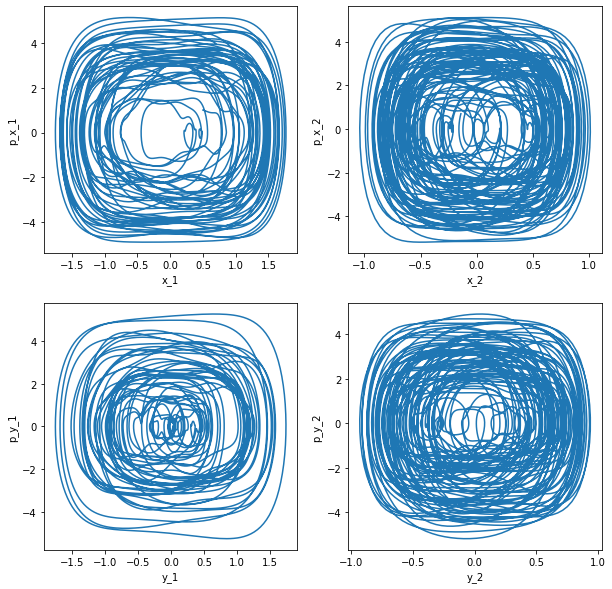

In [86]:
plt.figure(figsize = (10,10))

simulation(.5, .3, .2, .1, 1, 2, 3, 4)
plt.subplot(2,2,1)
plt.plot(coordinates_list[0], coordinates_list[4])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

plt.subplot(2,2,2)
plt.plot(coordinates_list[1], coordinates_list[5])
plt.xlabel("x_2")
plt.ylabel("p_x_2")

plt.subplot(2,2,3)
plt.plot(coordinates_list[2], coordinates_list[6])
plt.xlabel("y_1")
plt.ylabel("p_y_1")

plt.subplot(2,2,4)
plt.plot(coordinates_list[3], coordinates_list[7])
plt.xlabel("y_2")
plt.ylabel("p_y_2")



In [87]:
H(Coords[labels[0]], Coords[labels[1]], Coords[labels[2]], Coords[labels[3]], Coords[labels[4]], Coords[labels[5]], 
  Coords[labels[6]], Coords[labels[7]], Coords[labels[8]], Coords[labels[9]], Coords[labels[10]], 
  Coords[labels[11]],5.75, 0.9)

0.00      15.33338879500
0.01      15.33341622120
0.02      15.33661512359
0.03      15.34110270076
0.04      15.34766689651
               ...      
99.96     15.92378384786
99.97     15.86867801291
99.98     15.80759192923
99.99     15.74358559632
100.00    15.67946382069
Length: 10001, dtype: float64

### The first simulation() and simulation_3() are both wrong as they do not preserve the Hamiltonian.
The problem lies in the p_dots definitions, they are wrong somehow. They are symmetrical which is good but they are giving different answers when x_1 != x_2 that dHx_1 and dHx_2 would give. So I think somewhere there are a x_1 and x_2 swapped or something in the definition from mathematica

# Redo exercise with sympy

## Simulation with Sympy

Turn the Hamiltonian as already defined into a sympy function. The sympy package can do symbolic manipulation well so differentiate the Hamiltonian to get the canonical equations with sympy

Turn the coordinates into sympy symbols

In [8]:
x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2 = symbols(
"x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2")

In [9]:
Hi = H(x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2)
Hi

0.5*Lambda_1**2*x_2**6 + 1.5*Lambda_1**2*x_2**4*y_2**2 + 1.5*Lambda_1**2*x_2**2*y_2**4 + 0.5*Lambda_1**2*y_2**6 + Lambda_1*x_1*x_2**3 - 3*Lambda_1*x_1*x_2*y_2**2 + 3*Lambda_1*x_2**2*y_1*y_2 - Lambda_1*y_1*y_2**3 + 0.5*Lambda_2**2*x_1**6 + 1.5*Lambda_2**2*x_1**4*y_1**2 + 1.5*Lambda_2**2*x_1**2*y_1**4 + 0.5*Lambda_2**2*y_1**6 + Lambda_2*x_1**3*x_2 + 3*Lambda_2*x_1**2*y_1*y_2 - 3*Lambda_2*x_1*x_2*y_1**2 - Lambda_2*y_1**3*y_2 + 0.5*p_x_1**2 + 0.5*p_x_2**2 + 0.5*p_y_1**2 + 0.5*p_y_2**2 + x_1**2/2 + x_2**2/2 + y_1**2/2 + y_2**2/2

In [37]:
H(3,4,5,6,7,8,9,10,11,0,0,0,1,2)

146894.0

Differentiate the Hamiltonian.

In [10]:
Hi_x_1 = Hi.diff(x_1).simplify()
Hi_x_2 = Hi.diff(x_2).simplify()
Hi_y_1 = Hi.diff(y_1).simplify()
Hi_y_2 = Hi.diff(y_2).simplify()
Hi_p_x_1 = Hi.diff(p_x_1).simplify()
Hi_p_x_2 = Hi.diff(p_x_2).simplify()
Hi_p_y_1 = Hi.diff(p_y_1).simplify()
Hi_p_y_2 = Hi.diff(p_y_2).simplify()

Use lambdify() to turn the differentiated sympy equations back into python equations that I can actually put variables into.

In [11]:
dHi_x_1 = lambdify((x_1, x_2, y_1, y_2, Lambda_1, Lambda_2),Hi_x_1)
dHi_x_2 = lambdify((x_1, x_2, y_1, y_2, Lambda_1, Lambda_2),Hi_x_2)
dHi_y_1 = lambdify((x_1, x_2, y_1, y_2, Lambda_1, Lambda_2),Hi_y_1)
dHi_y_2 = lambdify((x_1, x_2, y_1, y_2, Lambda_1, Lambda_2),Hi_y_2)
dHi_p_x_1 = lambdify((x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2),Hi_p_x_1)
dHi_p_x_2 = lambdify((x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2),Hi_p_x_2)
dHi_p_y_1 = lambdify((x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2),Hi_p_y_1)
dHi_p_y_2 = lambdify((x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2),Hi_p_y_2)


Check that the symmetry of the Hamiltonian if Lambda_1 = Lambda_2 holds. If it does then differentiating with respect to x_1 
should be the same as differentiating with respect to x_2.

In [12]:
-dHi_x_1(.3, .3, .3, .3, 0.01, 0.01)

-dHi_x_2(.3, .3, .3, .3, 0.01, 0.01) == -dHi_x_1(.3, .3, .3, .3, 0.01, 0.01)


True

In [13]:
-dHi_y_2(.3, .3, .3, .3, 0.01, 0.01) == -dHi_y_1(.3, .3, .3, .3, 0.01, 0.01)


True

In [14]:
conditions = np.array([.2003402, 3, .2003402,2, 0.01, 0.01])

print(P_x_dot_1(*conditions))
print(P_x_dot_2(*conditions))

print(-dHi_x_1(*conditions))
print(-dHi_x_2(*conditions))

print(P_y_dot_1(*conditions))
print(P_y_dot_2(*conditions))

print(-dHi_y_1(*conditions))
print(-dHi_y_2(*conditions))

# Different when they should be the same if x_1 != x_2 and y_1 != y_2

-0.11515693076537434
-3.25411268413038
-0.11515693076537441
-3.25411268413038
-0.6531160720445623
-2.0594893758696196
-0.6531160720445623
-2.05948937586962


#### Redo simulation with sympy definitions

In [218]:
def simulation_alt(x_1, x_2, y_1, y_2, 
               p_x_1, p_x_2, p_y_1, p_y_2, Lambda_1, Lambda_2, delta_t):
    
    
    # The rates of change of momenta are linked to the coordinates by the Hamiltonian canonical equations
    # Calculate them.
        
    p_x_dot_1 = -dHi_x_1(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)
    
    
    p_x_dot_2 = -dHi_x_2(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)
    
    p_y_dot_1 = -dHi_y_1(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)

    p_y_dot_2 = -dHi_y_2(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)
    
    labels = ["x_1", "x_2", "y_1", "y_2", 
               "p_x_1", "p_x_2", "p_y_1", "p_y_2", 
               "p_x_dot_1", "p_x_dot_2", "p_y_dot_1", "p_y_dot_2"]
    
    i = 0

    # Define number of steps between measurement recordings
    record_steps = 1


    # Initial coordinates 
    old_coordinates = [x_1, x_2, y_1, y_2, 
               p_x_1, p_x_2, p_y_1, p_y_2, 
               p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2]

    # Coordinates list to record simulation dynamics
    global coordinates_list
    coordinates_list = [[x_1], [x_2], [y_1], [y_2], 
               [p_x_1], [p_x_2], [p_y_1], [p_y_2], 
               [p_x_dot_1], [p_x_dot_2], [p_y_dot_1], [p_y_dot_2]]


    simulation_repetitions = 100000
    
    # Repeating algorithm
    while i < simulation_repetitions:
        
        # Define old variables
        [x_1_old, x_2_old, y_1_old, y_2_old, p_x_1_old, p_x_2_old, p_y_1_old, p_y_2_old, p_x_dot_1_old,
         p_x_dot_2_old, p_y_dot_1_old, p_y_dot_2_old] = old_coordinates
        
        
        # b) velocity Verlet 1 to get new positions from old positions, momentums and rate of change of momentums
        
        x_1_new = (x_1_old + p_x_1_old * delta_t + 1/2 * p_x_dot_1_old * delta_t**2)
        x_2_new = (x_2_old + p_x_2_old * delta_t + 1/2 * p_x_dot_2_old * delta_t**2)
        y_1_new = (y_1_old + p_y_1_old * delta_t + 1/2 * p_y_dot_1_old * delta_t**2)
        y_2_new = (y_2_old + p_y_2_old * delta_t + 1/2 * p_y_dot_2_old * delta_t**2)

        
        # c) Use Hamiltonian canonical equations to get new p_dot values
        
        p_x_dot_1_new = -dHi_x_1(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)
    
        p_x_dot_2_new = -dHi_x_2(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)
    
        p_y_dot_1_new = -dHi_y_1(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)

        p_y_dot_2_new = -dHi_y_2(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)


        # d) Use Velocity Verlet 2 to get new momentums

        p_x_1_new = (p_x_1_old + (1/2) * (p_x_dot_1_new + p_x_dot_1_old) * delta_t)
        p_x_2_new = (p_x_2_old + (1/2) * (p_x_dot_2_new + p_x_dot_2_old) * delta_t)
        p_y_1_new = (p_y_1_old + (1/2) * (p_y_dot_1_new + p_y_dot_1_old) * delta_t)
        p_y_2_new = (p_y_2_old + (1/2) * (p_y_dot_2_new + p_y_dot_2_old) * delta_t)

        new_coordinates = [x_1_new, x_2_new, y_1_new, y_2_new, 
                           p_x_1_new, p_x_2_new, p_y_1_new, p_y_2_new,
                           p_x_dot_1_new, p_x_dot_2_new, p_y_dot_1_new, p_y_dot_2_new]
        
        
        # Recording position, momentum, and rate of change of momentum every 10th step
        if i % record_steps == 0:
            h = 0

            while h < len(coordinates_list):
                coordinates_list[h].append(new_coordinates[h])
                h += 1
                
                
        # Update new coordinates

        old_coordinates = new_coordinates

        i += 1
    global times
    times = np.arange(0,simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)
    
    coords_dict = {"times" : times, labels[0] : coordinates_list[0], labels[0] : coordinates_list[0], 
                  labels[1] : coordinates_list[1], labels[2] : coordinates_list[2], labels[3] : coordinates_list[3], 
                  labels[4] : coordinates_list[4], labels[5] : coordinates_list[5], labels[6] : coordinates_list[6], 
                  labels[7] : coordinates_list[7], labels[8] : coordinates_list[8], labels[9] : coordinates_list[9], 
                  labels[10] : coordinates_list[10], labels[11] : coordinates_list[11]}
    
    global Coords
    Coords = DF(coords_dict, index = coords_dict["times"], columns = labels)
    return Coords

In [134]:
print(H_conserved(Particle_1, .0001, .0002))

0.0000      4438.05021900330
0.0001      4438.05021900371
0.0002      4438.05021900412
0.0003      4438.05021900453
0.0004      4438.05021900494
                  ...       
99.9996     4438.05021913141
99.9997     4438.05021913221
99.9998     4438.05021913302
99.9999     4438.05021913383
100.0000    4438.05021913463
Length: 1000001, dtype: float64


### Do two trajectories and check their chaotic nature

In [135]:
10e-4

0.001

In [138]:
Particle_1 = simulation_alt(23, -9.92, 2, -11.01, -10.5, 80, 40.7, -0.6, .0001, .0002, 0.0001)
#Particle_2 = simulation_alt(23, -9.92, 2, -11.01, -10.5, 80, 40.7, -0.6, .0001, .0002, 0.0001)

In [137]:
Particle_1

,x_1,x_2,y_1,y_2,p_x_1,p_x_2,p_y_1,p_y_2,p_x_dot_1,p_x_dot_2,p_y_dot_1,p_y_dot_2
0.0000,23.00000000000,-9.92000000000,2.00000000000,-11.01000000000,-10.50000000000,80.00000000000,40.70000000000,-0.60000000000,-20.31466550880,7.58250646393,1.04395764910,11.91364546458
0.0001,22.99894989843,-9.91199996209,2.00407000522,-11.01005994043,-10.50203148959,80.00075792358,40.70010410678,-0.59880875239,-20.31512634142,7.57596504037,1.03817797103,11.91130668950
0.0002,22.99789959370,-9.90399984842,2.00814002082,-11.01011976175,-10.50406302523,80.00151519300,40.70020763569,-0.59761773863,-20.31558641138,7.56942351284,1.03240027756,11.90896847917
0.0003,22.99684908582,-9.89599965905,2.01221004675,-11.01017946398,-10.50609460684,80.00227180827,40.70031058694,-0.59642695867,-20.31604571845,7.56288188132,1.02662456861,11.90663083331
0.0004,22.99579837478,-9.88799939405,2.01628008294,-11.01023904714,-10.50812623434,80.00302776937,40.70041296071,-0.59523641244,-20.31650426239,7.55634014575,1.02085084405,11.90429375170
...,...,...,...,...,...,...,...,...,...,...,...,...
9.9996,48.61029146975,-63.01142672023,10.84860389842,-30.17326290931,-48.75077509367,-20.65849036288,-6.03745907507,41.90413789786,27.28314907943,31.50450644980,15.10674030552,82.10554988526
9.9997,48.60541652865,-63.01349241174,10.84800022804,-30.16907208499,-48.74804633004,-20.65533946936,-6.03594871971,41.91234766370,27.29212354703,31.51336403843,15.10036688535,82.08976678436
9.9998,48.60054186048,-63.01555778812,10.84739670867,-30.16488043978,-48.74531666926,-20.65218769014,-6.03443900179,41.92055585104,27.30109212238,31.52222038258,15.09399158583,82.07398013393
9.9999,48.59566746532,-63.01762284928,10.84679334024,-30.16068797382,-48.74258611191,-20.64903502534,-6.03292992149,41.92876245955,27.31005480810,31.53107548283,15.08761440810,82.05818993583


Check that the Hamiltonian is conserved

In [17]:
def H_conserved(Particle_1, Lambda_1, Lambda_2):
    
    K = H(Particle_1[labels[0]], Particle_1[labels[1]], Particle_1[labels[2]], Particle_1[labels[3]], Particle_1[labels[4]],
          Particle_1[labels[5]], Particle_1[labels[6]], Particle_1[labels[7]], Particle_1[labels[8]], Particle_1[labels[9]], 
          Particle_1[labels[10]], Particle_1[labels[11]], Lambda_1, Lambda_2)
    
    return K

In [18]:
print(H_conserved(Particle_1, 1.27, 0.9), H_conserved(Particle_1, 1.27, 0.9)) 

0.00     0.25404799500
0.01     0.25404799500
0.02     0.25404799500
0.03     0.25404799500
0.04     0.25404799500
             ...      
9.96     0.25404799479
9.97     0.25404799479
9.98     0.25404799480
9.99     0.25404799480
10.00    0.25404799481
Length: 1001, dtype: float64 0.00     0.25404799500
0.01     0.25404799500
0.02     0.25404799500
0.03     0.25404799500
0.04     0.25404799500
             ...      
9.96     0.25404799479
9.97     0.25404799479
9.98     0.25404799480
9.99     0.25404799480
10.00    0.25404799481
Length: 1001, dtype: float64


### Plot trajectories of both points

Text(0, 0.5, 'p_y_2')

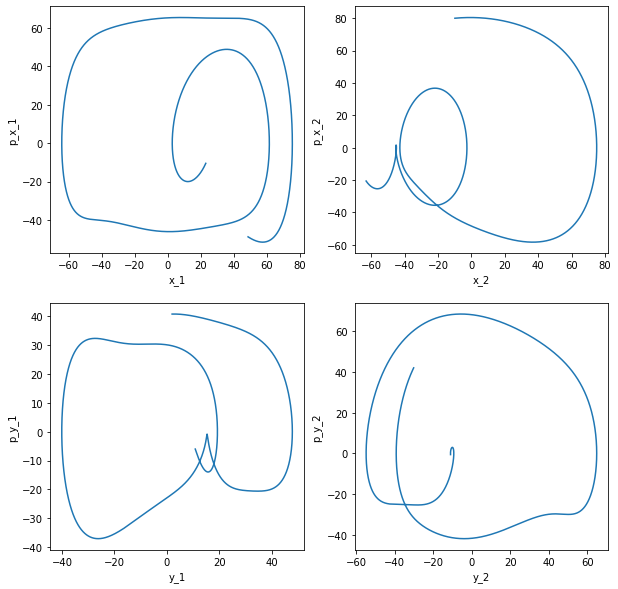

In [40]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.plot(Particle_1["x_1"], Particle_1["p_x_1"])
#plt.plot(Particle_2["x_1"], Particle_2["p_x_1"])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

plt.subplot(2,2,2)
plt.plot(Particle_1["x_2"], Particle_1["p_x_2"])
#plt.plot(Particle_2["x_2"], Particle_2["p_x_2"])
plt.xlabel("x_2")
plt.ylabel("p_x_2")

plt.subplot(2,2,3)
plt.plot(Particle_1["y_1"], Particle_1["p_y_1"])
#plt.plot(Particle_2["y_1"], Particle_2["p_y_1"])
plt.xlabel("y_1")
plt.ylabel("p_y_1")

plt.subplot(2,2,4)
plt.plot(Particle_1["y_2"], Particle_1["p_y_2"])
#plt.plot(Particle_2["y_2"], Particle_2["p_y_2"])
plt.xlabel("y_2")
plt.ylabel("p_y_2")

ValueError: x and y must have same first dimension, but have shapes (100001,) and (1001,)

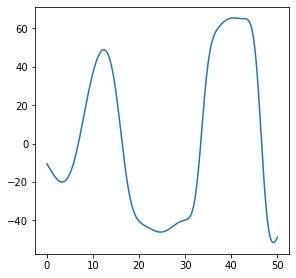

In [63]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.plot(times, Particle_1["p_x_1"])
plt.plot(times, Particle_2["p_x_1"])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

plt.subplot(2,2,2)
plt.plot(times, Particle_1["p_x_2"])
plt.plot(times, Particle_2["p_x_2"])
plt.xlabel("x_2")
plt.ylabel("p_x_2")

plt.subplot(2,2,3)
plt.plot(times, Particle_1["p_y_1"])
plt.plot(times, Particle_2["p_y_1"])
plt.xlabel("y_1")
plt.ylabel("p_y_1")

plt.subplot(2,2,4)
plt.plot(times, Particle_1["p_y_2"])
plt.plot(times, Particle_2["p_y_2"])
plt.xlabel("y_2")
plt.ylabel("p_y_2")

## Check validity of simulation in time

1. Simulate the same dynamics with two different time steps, say
10^{-4} and 5*10^{-1}.
It is useful to check when they start diverging, that way we know
when we stop trusting the simulation.

In [21]:
print(10e-4, 5e-1)

0.001 0.5


In [80]:
time_step_1 = simulation_alt(23, -9.92, 2, -11.01, -10.5, 80, 40.7, -0.6, .0001, .0002, 0.0001)
print(H_conserved(time_step_1, .0001, .0002))


time_step_2 = simulation_alt(23, -9.92, 2, -11.01, -10.5, 80, 40.7, -0.6, .0001, .0002, 0.0005)
print(H_conserved(time_step_2, .0001, .0002))

0.0000      4438.05021900330
0.0001      4438.05021900371
0.0002      4438.05021900412
0.0003      4438.05021900453
0.0004      4438.05021900494
                  ...       
99.9996     4438.05021913141
99.9997     4438.05021913221
99.9998     4438.05021913302
99.9999     4438.05021913383
100.0000    4438.05021913463
Length: 1000001, dtype: float64
0.0000      4438.05021900330
0.0005      4438.05021905466
0.0010      4438.05021910604
0.0015      4438.05021915744
0.0020      4438.05021920887
                  ...       
499.9980    4438.05015134109
499.9985    4438.05015233161
499.9990    4438.05015332508
499.9995    4438.05015432149
500.0000    4438.05015532085
Length: 1000001, dtype: float64


Text(0, 0.5, 'p_x_1')

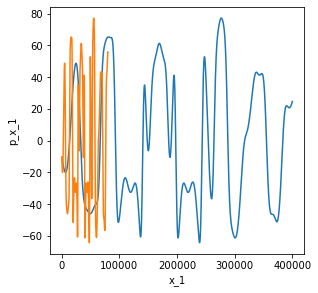

In [216]:
plt.figure(figsize = (10,10))
t1 = np.arange(1, len(time_step_1["p_x_1"][:end])+1, 1)
t2 = np.arange(1, len(time_step_2["p_x_1"][:end])+1, 1)

plt.subplot(2,2,1)
plt.plot(t1, time_step_1["p_x_1"][:end])
plt.plot(t2, time_step_2["p_x_1"][:end])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

In [172]:
end = 40
time_step_1["y_1"][:end]

0.0000     2.00000000000
0.0001     2.00407000522
0.0002     2.00814002082
0.0003     2.01221004675
0.0004     2.01628008294
               ...      
39.9996   -4.07475474267
39.9997   -4.07141079454
39.9998   -4.06806682519
39.9999   -4.06472283464
40.0000   -4.06137882295
Name: y_1, Length: 400001, dtype: float64

Text(0, 0.5, 'p_y_2')

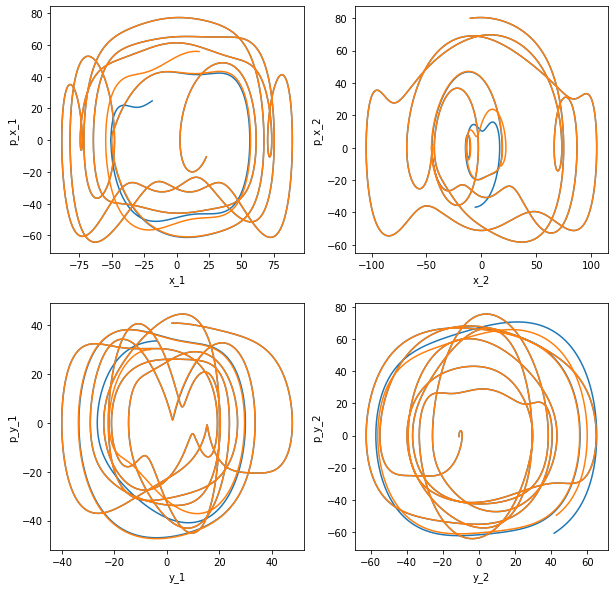

In [186]:
plt.figure(figsize = (10,10))
end = 40
plt.subplot(2,2,1)
plt.plot(time_step_1["x_1"][:end], time_step_1["p_x_1"][:end])
plt.plot(time_step_2["x_1"][:end], time_step_2["p_x_1"][:end])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

plt.subplot(2,2,2)
plt.plot(time_step_1["x_2"][:end], time_step_1["p_x_2"][:end])
plt.plot(time_step_2["x_2"][:end], time_step_2["p_x_2"][:end])
plt.xlabel("x_2")
plt.ylabel("p_x_2")

plt.subplot(2,2,3)
plt.plot(time_step_1["y_1"][:end], time_step_1["p_y_1"][:end])
plt.plot(time_step_2["y_1"][:end], time_step_2["p_y_1"][:end])
plt.xlabel("y_1")
plt.ylabel("p_y_1")

plt.subplot(2,2,4)
plt.plot(time_step_1["y_2"][:end], time_step_1["p_y_2"][:end])
plt.plot(time_step_2["y_2"][:end], time_step_2["p_y_2"][:end])
plt.xlabel("y_2")
plt.ylabel("p_y_2")

In [187]:
def separation(a,b):
    return abs(a.values-b.values)

In [188]:
print(time_step_1.iloc[:,0])
print(time_step_2.iloc[:,0])

0.0000      23.00000000000
0.0001      22.99894989843
0.0002      22.99789959370
0.0003      22.99684908582
0.0004      22.99579837478
                 ...      
99.9996    -14.00898440528
99.9997    -14.01065226848
99.9998    -14.01231970263
99.9999    -14.01398670771
100.0000   -14.01565328368
Name: x_1, Length: 1000001, dtype: float64
0.0000      23.00000000000
0.0005      22.99474746067
0.0010      22.98948984209
0.0015      22.98422714371
0.0020      22.97895936495
                 ...      
499.9980   -49.40850085814
499.9985   -49.43031714096
499.9990   -49.45211443989
499.9995   -49.47389271553
500.0000   -49.49565192844
Name: x_1, Length: 1000001, dtype: float64


In [189]:
time_step_2.iloc[:,0]

0.0000      23.00000000000
0.0005      22.99474746067
0.0010      22.98948984209
0.0015      22.98422714371
0.0020      22.97895936495
                 ...      
499.9980   -49.40850085814
499.9985   -49.43031714096
499.9990   -49.45211443989
499.9995   -49.47389271553
500.0000   -49.49565192844
Name: x_1, Length: 1000001, dtype: float64

In [190]:
print(separation(time_step_1.iloc[:,0], time_step_2.iloc[:,0]))

[0.00000000e+00 4.20243776e-03 8.40975161e-03 ... 3.54397947e+01
 3.54599060e+01 3.54799986e+01]


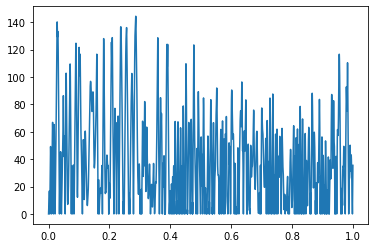

In [191]:
times = np.arange(0,1.000001, .000001)
plt.plot(times, separation(time_step_1.iloc[:,0], time_step_2.iloc[:,0]))

Plot the time evolution of each phase space trajectory

ValueError: x and y must have same first dimension, but have shapes (400001,) and (80001,)

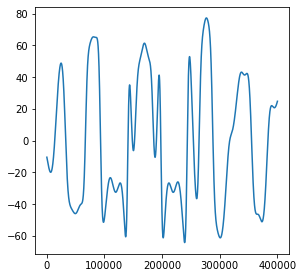

In [212]:
plt.figure(figsize = (10,10))
times = np.arange(1, 400001+1, 1)
plt.subplot(2,2,1)
plt.plot(times, time_step_1["p_x_1"][:end])
plt.plot(times, time_step_2["p_x_1"][:end])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

plt.subplot(2,2,2)
plt.plot(times, time_step_1["p_x_2"][:end])
plt.plot(times, time_step_2["p_x_2"][:end])
plt.xlabel("x_2")
plt.ylabel("p_x_2")

plt.subplot(2,2,3)
plt.plot(times, time_step_1["p_y_1"][:end])
plt.plot(times, time_step_2["p_y_1"][:end])
plt.xlabel("y_1")
plt.ylabel("p_y_1")

plt.subplot(2,2,4)
plt.plot(times, time_step_1["p_y_2"][:end])
plt.plot(times, time_step_2["p_y_2"][:end])
plt.xlabel("y_2")
plt.ylabel("p_y_2")

### Observe how the trajectories diverge.

2. Instead of looking at how separation of a particular coordinate or
momenta evolves, look at how the distance evolves with time.
E.g. if there is just one coordinate and one momentum, look at how
\sqrt{ (x_1 (t) -x_2(t))^2 +(p_1(t) -p_2(t) )^2 } changes with time.

In [ ]:
def separation():
    
    
    return

It is a good idea to plot the logarithm of this separation versus
time. This would be \lambda_L(t), i.e. Lyapunov exponent as a function
of time. If it saturates to some value, that is the actual Lyapunov
exponent.


3. For the 3rd example, compute \lambda_L(t) for some 20-30 examples,
all with same energy.
Plot them on the same graph.
Also plot their average and check if it saturates faster than
individual \lambda_L(t)-s